# *Optimizing Game Design with Data: A/B Testing for Engagement & Monetization*

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [3]:
#Load the data and assign them respectively.
#Load the control data and assign it to control_data
control_data = pd.read_csv('Control_Group_Data.csv')

#Load the test data and assign it to test_data
test_data = pd.read_csv('Test_Group_Data.csv')

In [5]:
#View the control data here
control_data.head(5)

,User_ID,Group,Sessions,Time_Spent_Minutes,Actions_Per_Session,Purchases,Average_Purchase_Value,Age,Gender
0,1,Control,5,138.221478,21.712515,2,16.740702,18,Other
1,2,Control,4,173.120081,24.677517,4,11.122373,25,Female
2,3,Control,4,76.816058,19.879195,1,11.127885,30,Female
3,4,Control,5,118.037733,18.099648,1,11.837157,25,Male
4,5,Control,5,129.099377,16.734740,3,6.045071,40,Female


In [7]:
#View the test data here
test_data.head(5)

,User_ID,Group,Sessions,Time_Spent_Minutes,Actions_Per_Session,Purchases,Average_Purchase_Value,Age,Gender
0,10001,Test,8,131.665394,15.011699,2,10.236533,40,Male
1,10002,Test,6,98.624825,18.789417,2,17.061626,45,Male
2,10003,Test,3,123.336965,22.588025,3,3.904987,18,Male
3,10004,Test,7,204.462366,10.377211,2,7.077072,45,Male
4,10005,Test,3,143.998878,12.994712,2,7.021393,35,Female


### Calculating control data and test data engagement and monetization score

In [9]:
# Calculate Engagement and Monetization Scores for control
control_data['Engagement_Score'] = (control_data['Sessions'] + control_data['Time_Spent_Minutes'] + 
                                    control_data['Actions_Per_Session']) / 3
control_data['Monetization_Score'] = (control_data['Purchases'] * control_data['Average_Purchase_Value']) / 10

# Calculate Engagement and Monetization Scores for test
test_data['Engagement_Score'] = (test_data['Sessions'] + test_data['Time_Spent_Minutes'] + 
                                 test_data['Actions_Per_Session']) / 3
test_data['Monetization_Score'] = (test_data['Purchases'] * test_data['Average_Purchase_Value']) / 10

# Combine into final dataset
ab_test_data = pd.concat([control_data, test_data], ignore_index=True)

In [11]:
#Load the sample data into the Library.
print ('The Test Data')
test_data.head(5)

The Test Data


,User_ID,Group,Sessions,Time_Spent_Minutes,Actions_Per_Session,Purchases,Average_Purchase_Value,Age,Gender,Engagement_Score,Monetization_Score
0,10001,Test,8,131.665394,15.011699,2,10.236533,40,Male,51.559031,2.047307
1,10002,Test,6,98.624825,18.789417,2,17.061626,45,Male,41.138081,3.412325
2,10003,Test,3,123.336965,22.588025,3,3.904987,18,Male,49.641663,1.171496
3,10004,Test,7,204.462366,10.377211,2,7.077072,45,Male,73.946526,1.415414
4,10005,Test,3,143.998878,12.994712,2,7.021393,35,Female,53.331197,1.404279


In [13]:
#Load the sample data into the Library.
print ('The Control Data')
control_data.head(5)

The Control Data


,User_ID,Group,Sessions,Time_Spent_Minutes,Actions_Per_Session,Purchases,Average_Purchase_Value,Age,Gender,Engagement_Score,Monetization_Score
0,1,Control,5,138.221478,21.712515,2,16.740702,18,Other,54.977998,3.348140
1,2,Control,4,173.120081,24.677517,4,11.122373,25,Female,67.265866,4.448949
2,3,Control,4,76.816058,19.879195,1,11.127885,30,Female,33.565084,1.112788
3,4,Control,5,118.037733,18.099648,1,11.837157,25,Male,47.045794,1.183716
4,5,Control,5,129.099377,16.734740,3,6.045071,40,Female,50.278039,1.813521


## Exploratory Data Analysis

In [15]:
#Load the sample data into the Library.
ab_test_data.head(5)

,User_ID,Group,Sessions,Time_Spent_Minutes,Actions_Per_Session,Purchases,Average_Purchase_Value,Age,Gender,Engagement_Score,Monetization_Score
0,1,Control,5,138.221478,21.712515,2,16.740702,18,Other,54.977998,3.348140
1,2,Control,4,173.120081,24.677517,4,11.122373,25,Female,67.265866,4.448949
2,3,Control,4,76.816058,19.879195,1,11.127885,30,Female,33.565084,1.112788
3,4,Control,5,118.037733,18.099648,1,11.837157,25,Male,47.045794,1.183716
4,5,Control,5,129.099377,16.734740,3,6.045071,40,Female,50.278039,1.813521


In [17]:
#Descritive Statistics of Test Data
control_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,10000.0,5000.500000,2886.895680,1.000000,2500.750000,5000.500000,7500.250000,10000.000000
Sessions,10000.0,5.000500,2.236918,0.000000,3.000000,5.000000,6.000000,17.000000
Time_Spent_Minutes,10000.0,119.879453,30.415913,18.462652,99.362895,120.009103,140.321520,223.317773
Actions_Per_Session,10000.0,15.059355,4.998747,-4.722968,11.731123,15.123790,18.450748,34.283151
Purchases,10000.0,1.983300,1.393921,0.000000,1.000000,2.000000,3.000000,12.000000
Average_Purchase_Value,10000.0,9.976222,2.991842,-1.115450,7.948561,9.974683,11.991398,21.298540
Age,10000.0,33.623500,9.426963,18.000000,25.000000,35.000000,40.000000,50.000000
Engagement_Score,10000.0,46.646436,10.313310,12.069531,39.680182,46.687236,53.550972,83.894735
Monetization_Score,10000.0,1.982230,1.583307,-0.264487,0.899686,1.677431,2.805397,16.754894


In [19]:
#Descritive Statistics of Test Data
test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,10000.0,15000.500000,2886.895680,10001.000000,12500.750000,15000.500000,17500.250000,20000.000000
Sessions,10000.0,5.206100,2.282662,0.000000,4.000000,5.000000,7.000000,17.000000
Time_Spent_Minutes,10000.0,125.189999,30.258758,2.575009,104.891846,125.538418,145.823468,238.210128
Actions_Per_Session,10000.0,15.986261,5.017648,-3.758717,12.669563,15.960740,19.353638,35.746889
Purchases,10000.0,2.200900,1.497052,0.000000,1.000000,2.000000,3.000000,11.000000
Average_Purchase_Value,10000.0,10.496246,2.972244,-1.510794,8.508345,10.542752,12.510320,21.534574
Age,10000.0,33.468200,9.372138,18.000000,25.000000,30.000000,40.000000,50.000000
Engagement_Score,10000.0,48.794120,10.247990,7.464270,41.861197,48.816297,55.722071,88.413542
Monetization_Score,10000.0,2.315355,1.766969,-0.302159,1.059393,2.012235,3.258562,12.289220


In [21]:
# Summary of the dataset
ab_test_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User_ID,20000.0,10000.500000,5773.647028,1.000000,5000.750000,10000.500000,15000.250000,20000.000000
Sessions,20000.0,5.103300,2.262186,0.000000,3.000000,5.000000,7.000000,17.000000
Time_Spent_Minutes,20000.0,122.534726,30.452666,2.575009,101.815362,122.847775,143.127126,238.210128
Actions_Per_Session,20000.0,15.522808,5.029481,-4.722968,12.178028,15.548818,18.893822,35.746889
Purchases,20000.0,2.092100,1.450456,0.000000,1.000000,2.000000,3.000000,12.000000
Average_Purchase_Value,20000.0,10.236234,2.993299,-1.510794,8.226229,10.242437,12.291448,21.534574
Age,20000.0,33.545850,9.399676,18.000000,25.000000,35.000000,40.000000,50.000000
Engagement_Score,20000.0,47.720278,10.336379,7.464270,40.757940,47.772284,54.733728,88.413542
Monetization_Score,20000.0,2.148793,1.685860,-0.302159,0.975941,1.843267,3.028140,16.754894


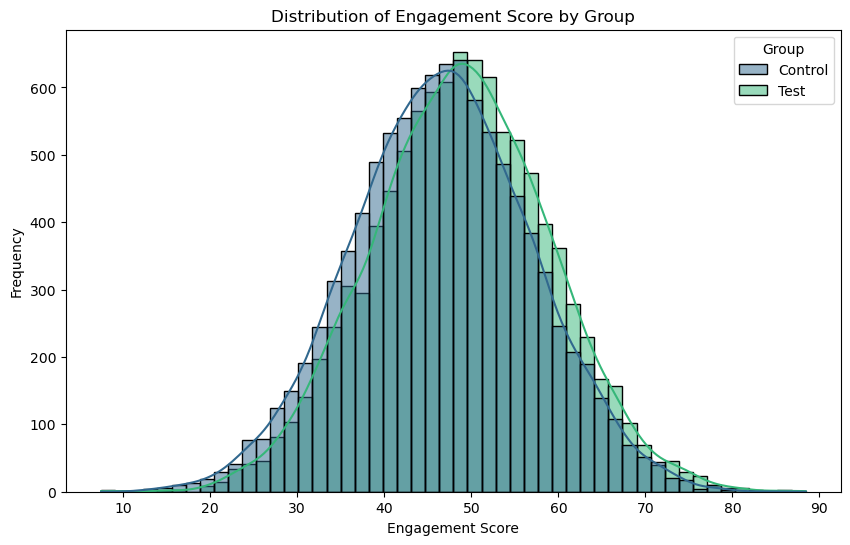

In [23]:
# Plot distribution of Engagement Score for both groups
plt.figure(figsize=(10, 6))
sns.histplot(data=ab_test_data, x='Engagement_Score', hue='Group', kde=True, bins=50, palette='viridis')
plt.title('Distribution of Engagement Score by Group')
plt.xlabel('Engagement Score')
plt.ylabel('Frequency')
plt.show()

> * A noticeable increase in the number of sessions for the test group compared to the control group indicates that the new mechanics successfully re-engage users.
> * A steep drop-off or concentration of low session counts may highlight a need to focus on retaining users after initial engagement.

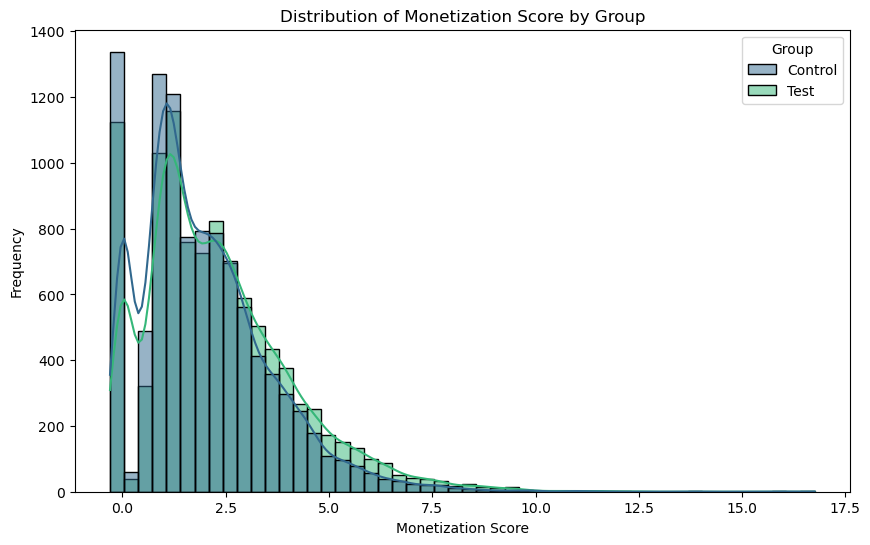

In [25]:
# Plot distribution of Monetization Score for both groups
plt.figure(figsize=(10, 6))
sns.histplot(data=ab_test_data, x='Monetization_Score', hue='Group', kde=True, bins=50, palette='viridis')
plt.title('Distribution of Monetization Score by Group')
plt.xlabel('Monetization Score')
plt.ylabel('Frequency')
plt.show()

> * If the test group shows higher median time spent, the new mechanics encourage users to stay in the game longer.
> * Large variability in the test group might suggest that the mechanics appeal only to certain user segments. Consider further analysis of subgroups.

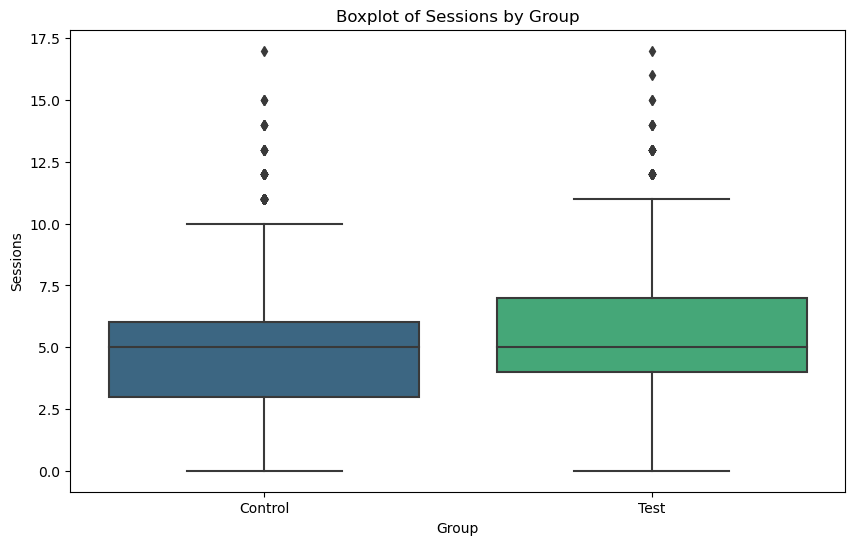

In [27]:
# Boxplot for Sessions by Group
plt.figure(figsize=(10, 6))
sns.boxplot(data=ab_test_data, x='Group', y='Sessions', palette='viridis')
plt.title('Boxplot of Sessions by Group')
plt.xlabel('Group')
plt.ylabel('Sessions')
plt.show()

* The boxplot shows that the median number of sessions is slightly higher in the test group compared to the control group, suggesting improved engagement due to the new mechanics. Both groups have a similar spread, but the test group exhibits more outliers, indicating a subset of highly active users who engage significantly more with the game. This suggests the mechanics may strongly appeal to certain users.

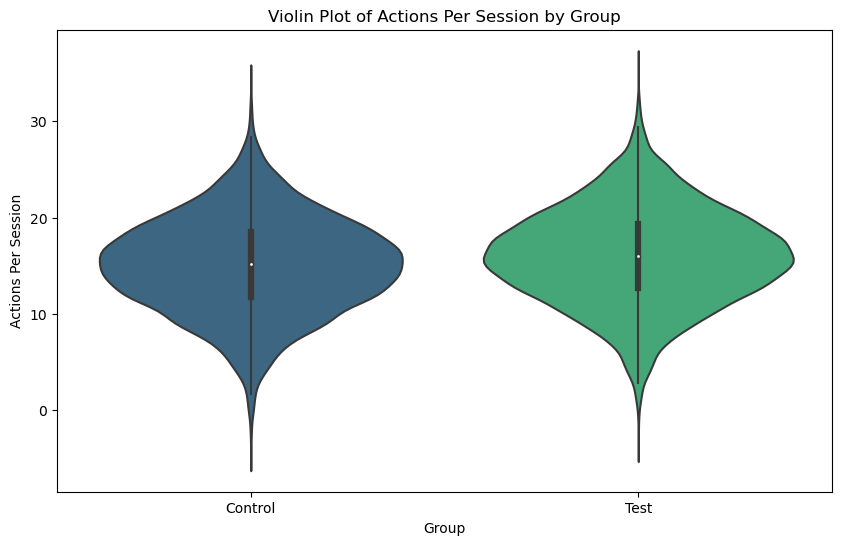

In [29]:
# Violin plot for Actions_Per_Session by Group
plt.figure(figsize=(10, 6))
sns.violinplot(data=ab_test_data, x='Group', y='Actions_Per_Session', palette='viridis', split=True)
plt.title('Violin Plot of Actions Per Session by Group')
plt.xlabel('Group')
plt.ylabel('Actions Per Session')
plt.show()

* The violin plot shows that the test group has a slightly higher median for actions per session compared to the control group, suggesting increased in-game activity. The distribution for both groups is similar, with a concentration around the median and some variability. This indicates that the new mechanics moderately enhance user interactions without drastically altering behavior patterns.

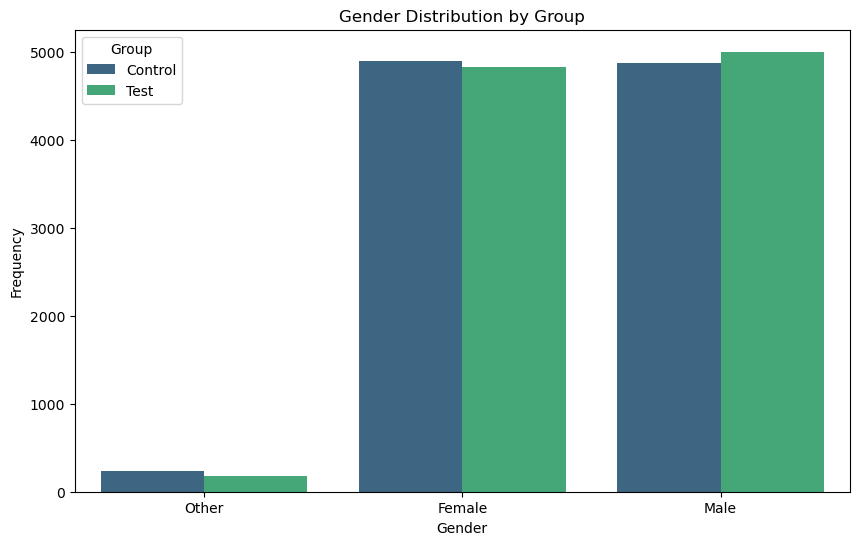

In [31]:
# Countplot for Gender distribution in both groups
plt.figure(figsize=(10, 6))
sns.countplot(data=ab_test_data, x='Gender', hue='Group', palette='viridis')
plt.title('Gender Distribution by Group')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

* This suggests from the bar chart a reasonably even balance in the gender breakdown between the control and test groups, with a very slight overweighting of males and females over the "Other" category. The balanced distribution ensures that gender is not a confounding variable, thus allowing comparisons to be drawn without bias between groups.

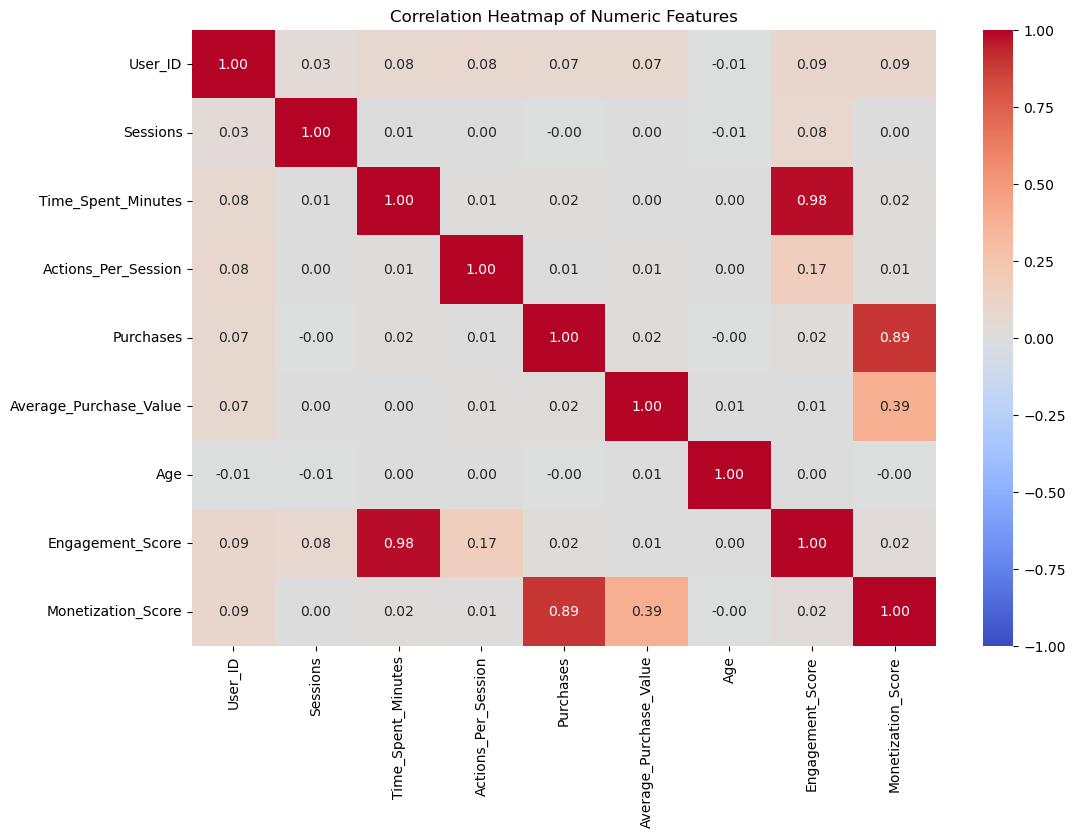

In [33]:
# Correlation heatmap for numeric features
numeric_features = ab_test_data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_features.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

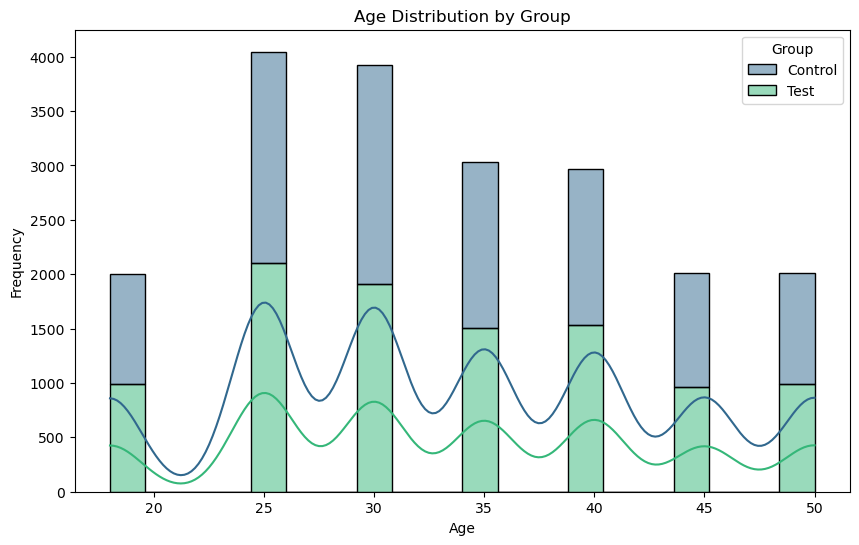

In [35]:
# Distribution of Age across Groups
plt.figure(figsize=(10, 6))
sns.histplot(data=ab_test_data, x='Age', hue='Group', multiple='stack', palette='viridis', kde=True, bins=20)
plt.title('Age Distribution by Group')
plt.ylabel('Frequency');
plt.xlabel('Age');

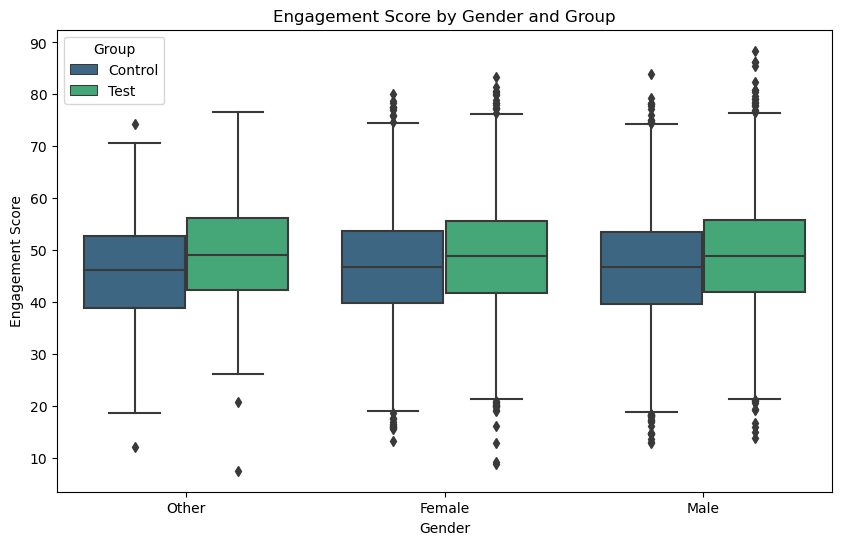

In [37]:
# Analyzing engagement by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=ab_test_data, x='Gender', y='Engagement_Score', hue='Group', palette='viridis')
plt.title('Engagement Score by Gender and Group')
plt.xlabel('Gender')
plt.ylabel('Engagement Score')
plt.legend(title='Group')
plt.show()

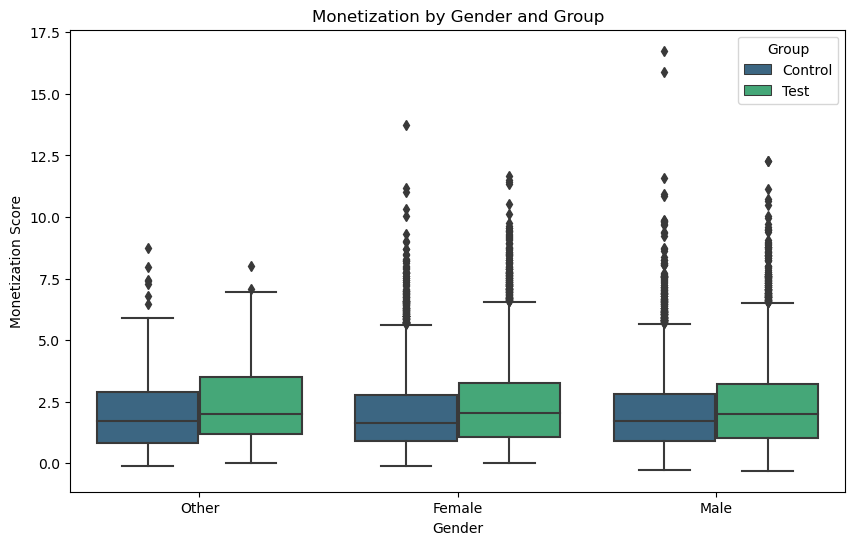

In [39]:
# Analyzing engagement by gender
plt.figure(figsize=(10, 6))
sns.boxplot(data=ab_test_data, x='Gender', y='Monetization_Score', hue='Group', palette='viridis')
plt.title('Monetization by Gender and Group')
plt.xlabel('Gender')
plt.ylabel('Monetization Score')
plt.legend(title='Group')
plt.show()

In [41]:
ab_test_data.head(5)

,User_ID,Group,Sessions,Time_Spent_Minutes,Actions_Per_Session,Purchases,Average_Purchase_Value,Age,Gender,Engagement_Score,Monetization_Score
0,1,Control,5,138.221478,21.712515,2,16.740702,18,Other,54.977998,3.348140
1,2,Control,4,173.120081,24.677517,4,11.122373,25,Female,67.265866,4.448949
2,3,Control,4,76.816058,19.879195,1,11.127885,30,Female,33.565084,1.112788
3,4,Control,5,118.037733,18.099648,1,11.837157,25,Male,47.045794,1.183716
4,5,Control,5,129.099377,16.734740,3,6.045071,40,Female,50.278039,1.813521


## Conducting A/B Statistical Analysis

In [43]:
# Recalculating means and standard deviations using the dataset from EDA
mean_control_monetization = ab_test_data[ab_test_data['Group'] == 'Control']['Monetization_Score'].mean()
mean_test_monetization = ab_test_data[ab_test_data['Group'] == 'Test']['Monetization_Score'].mean()

mean_control_engagement = ab_test_data[ab_test_data['Group'] == 'Control']['Engagement_Score'].mean()
mean_test_engagement = ab_test_data[ab_test_data['Group'] == 'Test']['Engagement_Score'].mean()


In [45]:
# Known population standard deviation
std_population_mon = 7.24  # Population standard deviation
std_population_eng = 5.38  # Population standard deviation
sample_size = 10000  # Sample size per group

In [47]:
# Hypothesis test for Monetization Score
z_score_monetization = (mean_test_monetization - mean_control_monetization) / (std_population_mon/ (sample_size ** 0.5))
p_value_monetization = 1 - norm.cdf(z_score_monetization)  # One-tailed test

In [49]:
# Hypothesis test for Engagement Score
z_score_engagement = (mean_test_engagement - mean_control_engagement) / (std_population_eng / (sample_size ** 0.5))
p_value_engagement = 1 - norm.cdf(z_score_engagement)  # One-tailed test

In [51]:
# Summarizing results
results = {
    "Metric": ["Monetization Score", "Engagement Score"],
    "Control Mean": [mean_control_monetization, mean_control_engagement],
    "Test Mean": [mean_test_monetization, mean_test_engagement],
    "Z-Score": [z_score_monetization, z_score_engagement],
    "P-Value": [p_value_monetization, p_value_engagement],
    "Significant (α=0.05)": [p_value_monetization < 0.05, p_value_engagement < 0.05],
     "Conclusion": [
        "Reject Null Hypothesis" if p_value_monetization < 0.05 else "Fail to Reject Null Hypothesis",
        "Reject Null Hypothesis" if p_value_engagement < 0.05 else "Fail to Reject Null Hypothesis"
    ]
}

# Displaying the results to the user
results_df = pd.DataFrame(results)

results_df

,Metric,Control Mean,Test Mean,Z-Score,P-Value,Significant (α=0.05),Conclusion
0,Monetization Score,1.982230,2.315355,4.601183,0.000002,True,Reject Null Hypothesis
1,Engagement Score,46.646436,48.794120,39.919771,0.000000,True,Reject Null Hypothesis


### *This table shows that both metrics, Monetization Score and Engagement Score, exhibit statistically significant improvements in the test group compared to the control group. The low p-values (less than 0.05) and positive Z-scores indicate a meaningful difference in favor of the test group. The conclusions to reject the null hypothesis confirm that the new game mechanics successfully enhance both monetization and engagement metrics.*

##                 *The END*